In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 10.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 36.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 15.5 MB/

In [5]:
from pycaret.datasets import get_data
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Show all columns in same row.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

dataset = get_data('credit')
display(dataset.head(4).T)
display(dataset.describe().T)


# Cannot use DataFrames with PyCaret's setup() function.
train = dataset.sample(frac=0.95, random_state=786)
test  = dataset.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(test.shape))

# show data types.
from pycaret.classification import *
exp_clf101 = setup(data = train, target = 'default', session_id=123)
print(exp_clf101)

print("*** Showing best model")
best_model = compare_models(fold = 5, sort= "Recall")
print(best_model)

# Need this step for PyCharm
print("*** Showing best model")
regression_results = pull()
print(regression_results)



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


,0,1,2,3
LIMIT_BAL,20000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,1.0,1.0
AGE,24.0,34.0,37.0,57.0
PAY_1,2.0,0.0,0.0,-1.0
PAY_2,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0
PAY_5,-2.0,0.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,24000.0,167876.403333,129907.454723,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,24000.0,1.600917,0.489720,1.0,1.00,2.0,2.00,2.0
EDUCATION,24000.0,1.850958,0.787361,0.0,1.00,2.0,2.00,6.0
MARRIAGE,24000.0,1.553000,0.521331,0.0,1.00,2.0,2.00,3.0
AGE,24000.0,35.446708,9.180845,21.0,28.00,34.0,41.00,79.0
PAY_1,24000.0,-0.023875,1.123806,-2.0,-1.00,0.0,0.00,8.0
PAY_2,24000.0,-0.140500,1.194216,-2.0,-1.00,0.0,0.00,8.0
PAY_3,24000.0,-0.170000,1.198712,-2.0,-1.00,0.0,0.00,8.0
PAY_4,24000.0,-0.221500,1.171784,-2.0,-1.00,0.0,0.00,8.0
PAY_5,24000.0,-0.266833,1.133220,-2.0,-1.00,0.0,0.00,8.0


Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


*** Showing best model


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.3889,0.6816,0.8765,0.2493,0.3881,0.0668,0.1273,0.1210
qda,Quadratic Discriminant Analysis,0.5668,0.7254,0.7861,0.3143,0.4468,0.1910,0.2460,0.1070
dt,Decision Tree Classifier,0.7295,0.6207,0.4244,0.3960,0.4096,0.2345,0.2348,0.0970
svm,SVM - Linear Kernel,0.6188,0.0000,0.3895,0.2528,0.2759,0.0585,0.0654,0.0830
catboost,CatBoost Classifier,0.8211,0.7872,0.3873,0.6641,0.4891,0.3897,0.4106,0.2530
rf,Random Forest Classifier,0.8193,0.7748,0.3870,0.6552,0.4864,0.3855,0.4053,0.4440
xgboost,Extreme Gradient Boosting,0.8165,0.7668,0.3861,0.6420,0.4818,0.3787,0.3970,0.1600
lightgbm,Light Gradient Boosting Machine,0.8202,0.7842,0.3816,0.6630,0.4842,0.3848,0.4064,0.3150
et,Extra Trees Classifier,0.8130,0.7677,0.3793,0.6277,0.4728,0.3674,0.3847,0.6080
gbc,Gradient Boosting Classifier,0.8225,0.7890,0.3756,0.6791,0.4834,0.3868,0.4117,0.1890


GaussianNB(priors=None, var_smoothing=1e-09)
*** Showing best model
                                    Model  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC  TT (Sec)
nb                            Naive Bayes    0.3889  0.6816  0.8765  0.2493  0.3881  0.0668  0.1273     0.121
qda       Quadratic Discriminant Analysis    0.5668  0.7254  0.7861  0.3143  0.4468  0.1910  0.2460     0.107
dt               Decision Tree Classifier    0.7295  0.6207  0.4244  0.3960  0.4096  0.2345  0.2348     0.097
svm                   SVM - Linear Kernel    0.6188  0.0000  0.3895  0.2528  0.2759  0.0585  0.0654     0.083
catboost              CatBoost Classifier    0.8211  0.7872  0.3873  0.6641  0.4891  0.3897  0.4106     0.253
rf               Random Forest Classifier    0.8193  0.7748  0.3870  0.6552  0.4864  0.3855  0.4053     0.444
xgboost         Extreme Gradient Boosting    0.8165  0.7668  0.3861  0.6420  0.4818  0.3787  0.3970     0.160
lightgbm  Light Gradient Boosting Machine    0.8202 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8058,0.0000,0.1700,0.7792,0.2791,0.2171,0.3027
1,0.8145,0.0000,0.2040,0.8276,0.3273,0.2628,0.3508
2,0.8045,0.0000,0.1870,0.7253,0.2973,0.2272,0.2987
3,0.8008,0.0000,0.1813,0.6882,0.2870,0.2145,0.2799
4,0.8089,0.0000,0.1813,0.8000,0.2956,0.2329,0.3204
5,0.8039,0.0000,0.1615,0.7703,0.2670,0.2061,0.2917
6,0.8008,0.0000,0.1643,0.7160,0.2673,0.2013,0.2757
7,0.7951,0.0000,0.1331,0.6912,0.2233,0.1635,0.2389
8,0.8020,0.0000,0.1756,0.7126,0.2818,0.2130,0.2843


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default
0          20000    2          2         1   24      2      2     -1     -1     -2     -2     3913.0     3102.0      689.0        0.0        0.0        0.0       0.0     689.0       0.0       0.0       0.0       0.0        1
1          90000    2          2         2   34      0      0      0      0      0      0    29239.0    14027.0    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0        0
2          50000    2          2         1   37      0      0      0      0      0      0    46990.0    48233.0    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0        0
3          50000    1          2         1   57     -1      0     -1      0      0      0     8617.0

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8058,0.0000,0.1671,0.7867,0.2757,0.2148,0.3026
1,0.8076,0.0000,0.1700,0.8108,0.2810,0.2213,0.3133
2,0.8020,0.0000,0.1700,0.7229,0.2752,0.2086,0.2831
3,0.8001,0.0000,0.1700,0.6977,0.2733,0.2044,0.2740
4,0.8051,0.0000,0.1671,0.7763,0.2751,0.2134,0.2991
5,0.8058,0.0000,0.1615,0.8028,0.2689,0.2104,0.3024
6,0.7995,0.0000,0.1530,0.7200,0.2523,0.1895,0.2669
7,0.7932,0.0000,0.1161,0.6949,0.1990,0.1449,0.2236
8,0.8014,0.0000,0.1586,0.7368,0.2611,0.1982,0.2778


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8073,0.0000,0.1784,0.7836,0.2907,0.2272,0.3120
1,0.8060,0.0000,0.1844,0.7509,0.2960,0.2288,0.3058
2,0.7971,0.0000,0.1548,0.6816,0.2523,0.1856,0.2551
Mean,0.8035,0.0000,0.1725,0.7387,0.2797,0.2139,0.2910
Std,0.0045,0.0000,0.0128,0.0425,0.0195,0.0200,0.0255


Fitting 3 folds for each of 10 candidates, totalling 30 fits


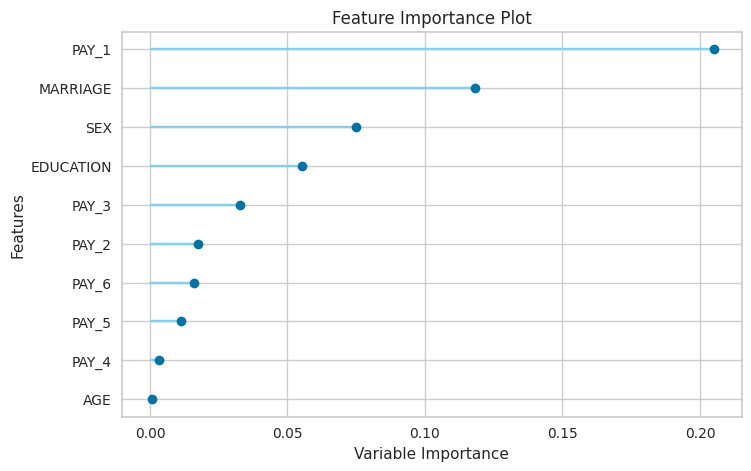

In [7]:
# example 3
from sklearn.linear_model import RidgeClassifier

from pycaret.datasets import get_data
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Show all columns in same row.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

dataset = get_data('credit')
print(dataset.T) # Transpose for a reader-friendly display

# Redo this for test_train_split
data        = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

ridge = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True, max_iter=None, random_state=123, solver='auto',
                tol=0.001)

tuned_ridge = tune_model(ridge)


#example 4 stuff


from pycaret.datasets import get_data
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Show all columns in same row.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

dataset = get_data('credit')
print(dataset) # Transpose for a reader-friendly display

# Redo this for test_train_split
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'default', session_id=123)
print(exp_clf101)

ridge = create_model('ridge')
tuned_ridge = tune_model(ridge, fold=3)
#evaluate_model(tuned_ridge)

plot_model(tuned_ridge, plot='feature')

evaluate_model(tuned_ridge)



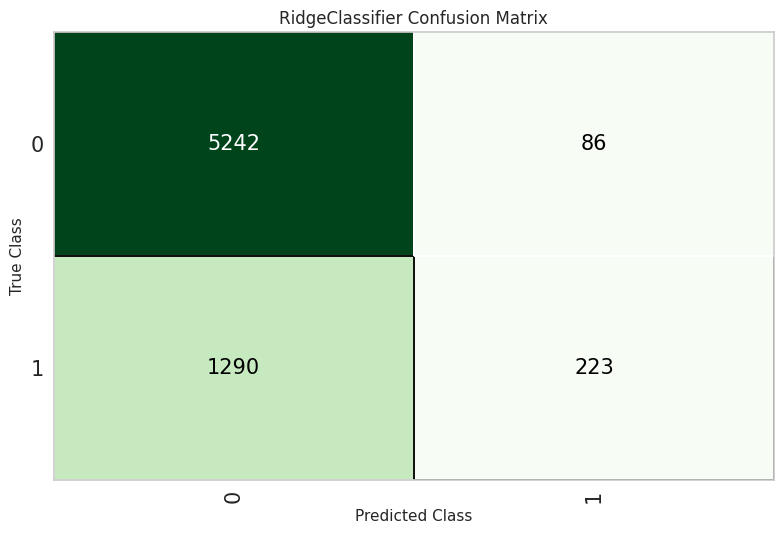

In [8]:
plot_model(tuned_ridge, plot = 'confusion_matrix')

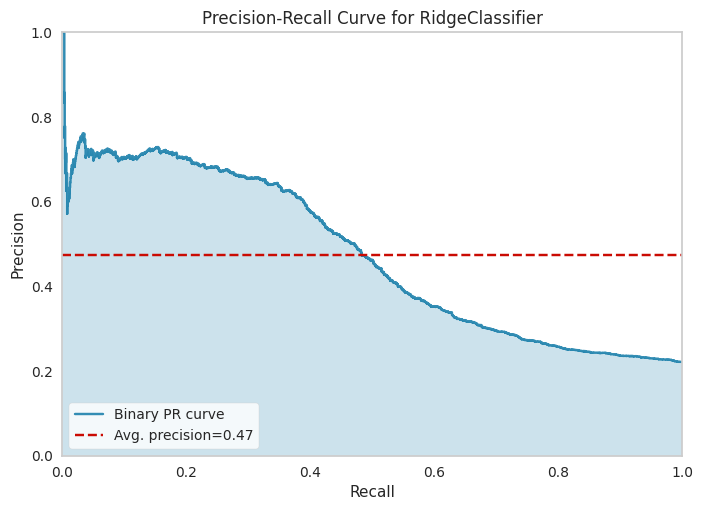

In [9]:
plot_model(tuned_ridge, plot = 'pr')

In [11]:
#example 6

from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from pycaret.datasets import get_data
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import classification_report, confusion_matrix

# Show all columns in same row.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = get_data('credit')
print(df)

from   sklearn.model_selection import train_test_split

# Re-assign X with significant columns only after chi-square test.
X = pd.get_dummies(df, columns=['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5',
                                'PAY_6', 'MARRIAGE', 'EDUCATION'])
# show all rows.
pd.set_option('display.max_rows', None)
X = X[["PAY_1_0",
"PAY_4_6",
"PAY_3_5",
"PAY_4_4",
"PAY_1_-2",
"PAY_1_2",
"PAY_1_3",
"PAY_1_5",
"PAY_4_5",
"PAY_1_-1",
"MARRIAGE_0",

]]
y = df['default']
# Split data.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.05)

# Build logistic regression model and make predictions.
clfModel = RidgeClassifier(alpha=3.37, class_weight=None,
                copy_X=True, fit_intercept=False, max_iter=None,
                 solver='auto', tol=0.001)
clfModel.fit(X_train,y_train)
y_pred=clfModel.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default
0          20000    2          2         1   24      2      2     -1     -1     -2     -2     3913.0     3102.0      689.0        0.0        0.0        0.0       0.0     689.0       0.0       0.0       0.0       0.0        1
1          90000    2          2         2   34      0      0      0      0      0      0    29239.0    14027.0    13559.0    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0        0
2          50000    2          2         1   37      0      0      0      0      0      0    46990.0    48233.0    49291.0    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0        0
3          50000    1          2         1   57     -1      0     -1      0      0      0     8617.0

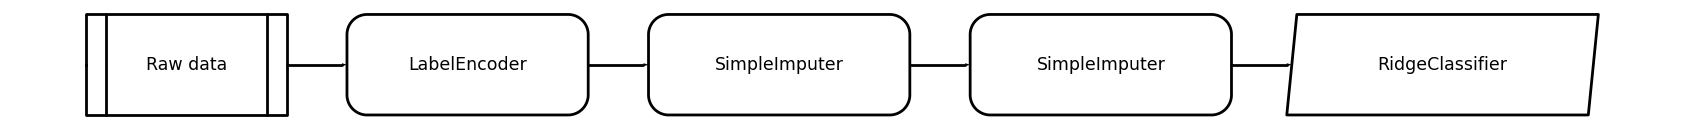

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
#exercise 5

from sklearn.linear_model import RidgeClassifier

from pycaret.datasets import get_data
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Show all columns in same row.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

dataset = pd.read_csv("iris_v2.csv")

print(dataset.T) # Transpose for a reader-friendly display

# Redo this for test_train_split
data        = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

ridge = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True, max_iter=None, random_state=123, solver='auto',
                tol=0.001)

tuned_ridge = tune_model(ridge)



from pycaret.datasets import get_data
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Show all columns in same row.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

dataset = pd.read_csv("iris_v2.csv")
print(dataset) # Transpose for a reader-friendly display

# Redo this for test_train_split
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'iris_type', session_id=123)
print(exp_clf101)

ridge = create_model('ridge')
tuned_ridge = tune_model(ridge, fold=3)
#evaluate_model(tuned_ridge)

plot_model(tuned_ridge, plot='feature')

evaluate_model(tuned_ridge)


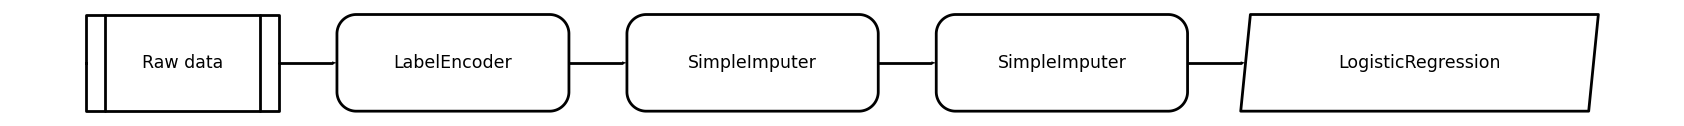

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

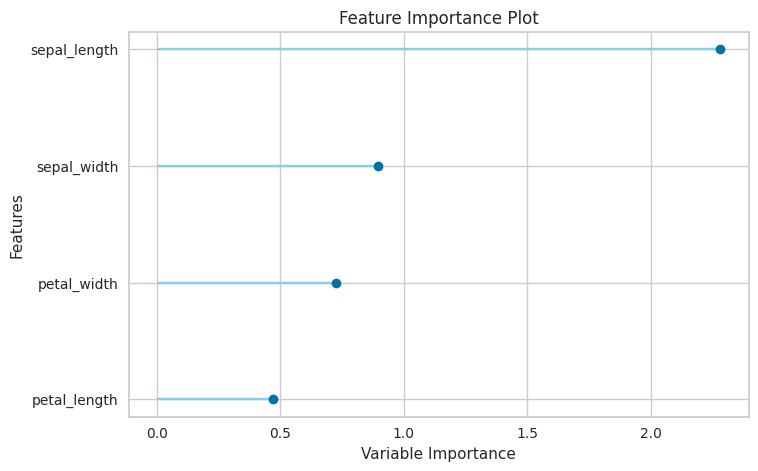

In [21]:
#exercise 5

import pandas as pd
from pycaret.classification import *

# Load data
dataset = pd.read_csv("iris_v2.csv")

# Split data into train and test sets
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

# Initialize PyCaret
exp_clf = setup(data=data, target='iris_type', session_id=123)

# Compare models and select the best performing one
best_model = compare_models()

# Tune the best model
tuned_model = tune_model(best_model)

# Evaluate the tuned model
evaluate_model(tuned_model)

# Plot the feature importance of the tuned model
plot_model(tuned_model, plot='feature')

In [23]:
#exercise 4

import pandas as pd
from pycaret.classification import *

# Load data
dataset = pd.read_csv("iris_v2.csv")

# Split data into train and test sets
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

# Initialize PyCaret
exp_clf = setup(data=data, target='iris_type', session_id=123)

# Train RidgeClassifier model
ridge = create_model('ridge')

# Tune hyperparameters using cross-validation and grid search
tuned_ridge = tune_model(ridge)

# Print the optimized hyperparameters
print("optimzed hyperparameters:", tuned_ridge.get_params())

,Description,Value
0,Session id,123
1,Target,iris_type
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(142, 5)"
5,Transformed data shape,"(142, 5)"
6,Transformed train set shape,"(99, 5)"
7,Transformed test set shape,"(43, 5)"
8,Numeric features,4
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.0000,0.9000,0.9250,0.9000,0.8507,0.8636
1,0.9000,0.0000,0.9000,0.9250,0.9000,0.8507,0.8636
2,0.7000,0.0000,0.7000,0.8500,0.6600,0.5652,0.6533
3,0.8000,0.0000,0.8000,0.8800,0.7750,0.6970,0.7435
4,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,0.7000,0.0000,0.7000,0.7167,0.7000,0.5522,0.5606
7,0.8000,0.0000,0.8000,0.8000,0.8000,0.6970,0.6970
8,0.9000,0.0000,0.9000,0.9200,0.8956,0.8462,0.8598


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.8000,0.8800,0.7917,0.7059,0.7504
1,0.8000,0.0000,0.8000,0.8800,0.7917,0.7059,0.7504
2,0.6000,0.0000,0.6000,0.4286,0.4800,0.4286,0.5698
3,0.8000,0.0000,0.8000,0.8800,0.7750,0.6970,0.7435
4,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.0000,0.8000,0.8000,0.8000,0.6970,0.6970
7,0.8000,0.0000,0.8000,0.8000,0.8000,0.6970,0.6970
8,0.9000,0.0000,0.9000,0.9200,0.8956,0.8462,0.8598


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
optimzed hyperparameters: {'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': 123, 'solver': 'auto', 'tol': 0.001}


In [24]:
#exercise 3

import pandas as pd
from pycaret.classification import *

# Load data
data = pd.read_csv("iris_v2.csv")

# Split data into train and test sets
train_data = data.sample(frac=0.95, random_state=786)
test_data = data.drop(train_data.index)
train_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)

# Initialize PyCaret
exp_clf = setup(data=train_data, target='iris_type', session_id=123)

# Compare models and evaluate performance
best_model = compare_models()

# Print the best performing model
print(best_model)

,Description,Value
0,Session id,123
1,Target,iris_type
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(142, 5)"
5,Transformed data shape,"(142, 5)"
6,Transformed train set shape,"(99, 5)"
7,Transformed test set shape,"(43, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9700,0.9938,0.9700,0.9717,0.9700,0.9552,0.9561,0.1210
knn,K Neighbors Classifier,0.9700,0.9910,0.9700,0.9725,0.9697,0.9545,0.9559,0.1720
nb,Naive Bayes,0.9700,0.9907,0.9700,0.9775,0.9700,0.9552,0.9591,0.1040
lda,Linear Discriminant Analysis,0.9700,0.9938,0.9700,0.9770,0.9696,0.9548,0.9587,0.1130
qda,Quadratic Discriminant Analysis,0.9600,0.9969,0.9600,0.9695,0.9590,0.9394,0.9447,0.1100
rf,Random Forest Classifier,0.9500,0.9907,0.9500,0.9605,0.9492,0.9254,0.9311,0.3190
ada,Ada Boost Classifier,0.9500,0.9907,0.9500,0.9605,0.9492,0.9254,0.9311,0.1880
xgboost,Extreme Gradient Boosting,0.9500,0.9907,0.9500,0.9605,0.9492,0.9254,0.9311,0.1390
catboost,CatBoost Classifier,0.9500,0.9907,0.9500,0.9605,0.9492,0.9254,0.9311,0.1090
dt,Decision Tree Classifier,0.9400,0.9560,0.9400,0.9525,0.9387,0.9100,0.9171,0.1060


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [25]:
#example 7

from pycaret.datasets import get_data

import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Show all columns in same row.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
dataset = get_data('diamond')

# Get data and hold some back for testing.
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123) 

best = compare_models()


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 29)"
5,Transformed train set shape,"(3779, 29)"
6,Transformed test set shape,"(1621, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,625.9478,2044484.6750,1364.5462,0.9807,0.0668,0.0490,2.0800
et,Extra Trees Regressor,758.7793,2661557.6112,1584.1538,0.9743,0.0820,0.0608,1.3770
xgboost,Extreme Gradient Boosting,709.3979,2805565.4010,1609.5328,0.9723,0.0743,0.0540,0.8360
rf,Random Forest Regressor,760.1499,2944058.4839,1663.3278,0.9714,0.0815,0.0596,1.2040
lightgbm,Light Gradient Boosting Machine,752.6246,3056225.3710,1687.9572,0.9711,0.0773,0.0567,0.4160
gbr,Gradient Boosting Regressor,919.8439,3757700.7801,1899.5914,0.9634,0.1024,0.0770,0.5240
dt,Decision Tree Regressor,1011.9136,5382439.9624,2244.3755,0.9465,0.1082,0.0779,0.2750
ridge,Ridge Regression,2413.5698,14120482.9350,3726.1631,0.8621,0.6689,0.2875,0.2810
lasso,Lasso Regression,2412.1916,14246796.5754,3744.2300,0.8608,0.6767,0.2866,0.3720
lar,Least Angle Regression,2414.6316,14246073.7943,3744.6109,0.8607,0.6678,0.2871,0.3130


In [31]:
# exercise 6 from chatgpt just took the optimzed parameters from here

import pandas as pd
from pycaret.classification import *

# Load data
data = pd.read_csv("winequality.csv")

# Split data into train and test sets
train_data = data.sample(frac=0.95, random_state=786)
test_data = data.drop(train_data.index)
train_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)

# Initialize PyCaret
exp_clf = setup(data=train_data, target='quality', session_id=123)

# Train and tune a logistic regression model
lr = create_model('lr')
tuned_lr = tune_model(lr)

# Print the best performing model
print(tuned_lr)


# Show the optimized parameters
plot_model(tuned_lr, plot='parameter')

# Show the residual error plot
plot_model(tuned_lr, plot='residuals')

# Show the feature importance plot
plot_model(tuned_lr, plot='feature')


,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1519, 12)"
5,Transformed data shape,"(1519, 12)"
6,Transformed train set shape,"(1063, 12)"
7,Transformed test set shape,"(456, 12)"
8,Numeric features,11
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6168,0.7778,0.6168,0.5771,0.5924,0.3760,0.3809
1,0.5794,0.7041,0.5794,0.5520,0.5387,0.2934,0.3045
2,0.5888,0.7703,0.5888,0.6067,0.5546,0.3091,0.3197
3,0.5755,0.0000,0.5755,0.5172,0.5346,0.2857,0.2943
4,0.5755,0.0000,0.5755,0.5253,0.5373,0.2842,0.2905
5,0.6132,0.0000,0.6132,0.5687,0.5670,0.3439,0.3538
6,0.5849,0.0000,0.5849,0.6070,0.5617,0.3021,0.3108
7,0.5377,0.6877,0.5377,0.5075,0.5218,0.2607,0.2616
8,0.6321,0.7999,0.6321,0.6042,0.6024,0.3903,0.3982


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6168,0.7782,0.6168,0.5771,0.5924,0.3760,0.3809
1,0.5794,0.7086,0.5794,0.5520,0.5387,0.2934,0.3045
2,0.6355,0.7672,0.6355,0.6524,0.6256,0.4043,0.4095
3,0.5943,0.0000,0.5943,0.5594,0.5644,0.3235,0.3322
4,0.6226,0.0000,0.6226,0.6286,0.6104,0.3795,0.3833
5,0.6038,0.0000,0.6038,0.5607,0.5659,0.3337,0.3420
6,0.5566,0.0000,0.5566,0.5316,0.5298,0.2569,0.2622
7,0.5472,0.6916,0.5472,0.5227,0.5329,0.2711,0.2724
8,0.6509,0.7968,0.6509,0.6244,0.6246,0.4237,0.4304


Fitting 10 folds for each of 10 candidates, totalling 100 fits
LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Parameters
C,7.863
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [33]:
#exercise 6 for best model type, residual error plot and feature importance
from pycaret.datasets import get_data

import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Show all columns in same row.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
dataset = pd.read_csv("winequality.csv")

# Get data and hold some back for testing.
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'quality', session_id=123) 

best = compare_models()


Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Regression
3,Original data shape,"(1439, 12)"
4,Transformed data shape,"(1439, 12)"
5,Transformed train set shape,"(1007, 12)"
6,Transformed test set shape,"(432, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4119,0.3552,0.5941,0.4557,0.0928,0.0767,0.4890
rf,Random Forest Regressor,0.4406,0.3603,0.5986,0.4480,0.0935,0.0819,0.6660
catboost,CatBoost Regressor,0.4483,0.3746,0.6108,0.4247,0.0959,0.0832,2.7820
lightgbm,Light Gradient Boosting Machine,0.4595,0.3884,0.6221,0.4045,0.0972,0.0851,0.3790
gbr,Gradient Boosting Regressor,0.4809,0.3906,0.6239,0.4014,0.0970,0.0886,0.3690
xgboost,Extreme Gradient Boosting,0.4481,0.4151,0.6420,0.3575,0.1016,0.0830,0.4410
lar,Least Angle Regression,0.5030,0.4245,0.6509,0.3484,0.1002,0.0923,0.1450
lr,Linear Regression,0.5030,0.4245,0.6509,0.3484,0.1002,0.0923,0.1570
ridge,Ridge Regression,0.5061,0.4263,0.6522,0.3461,0.1004,0.0928,0.1430
br,Bayesian Ridge,0.5061,0.4266,0.6524,0.3456,0.1004,0.0928,0.1480


In [34]:
# Create model 
ada = create_model('ada')
tuned_ada = tune_model(ada)
print(tuned_ada)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4400,0.3172,0.5632,0.4106,0.0865,0.0808
1,0.5246,0.4284,0.6545,0.2926,0.1002,0.0948
2,0.5680,0.4813,0.6938,0.3085,0.1018,0.0988
3,0.5627,0.4600,0.6783,0.1092,0.1041,0.1041
4,0.5302,0.4458,0.6677,0.3325,0.1027,0.0973
5,0.5311,0.4075,0.6384,0.4347,0.0965,0.0960
6,0.5684,0.4703,0.6858,0.4554,0.1136,0.1132
7,0.4851,0.4149,0.6442,0.2110,0.0984,0.0877
8,0.5492,0.4610,0.6790,0.3221,0.1058,0.1025


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4739,0.3205,0.5661,0.4045,0.0869,0.0865
1,0.5144,0.3727,0.6105,0.3847,0.0906,0.0913
2,0.5718,0.4544,0.6741,0.3471,0.0982,0.0988
3,0.5459,0.4280,0.6542,0.1712,0.1004,0.1001
4,0.5521,0.4331,0.6581,0.3514,0.1011,0.1008
5,0.5379,0.3903,0.6248,0.4586,0.0934,0.0954
6,0.5766,0.4889,0.6992,0.4339,0.1170,0.1157
7,0.5056,0.3882,0.6231,0.2618,0.0945,0.0904
8,0.5217,0.4294,0.6553,0.3686,0.1024,0.0969


Fitting 10 folds for each of 10 candidates, totalling 100 fits
AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)


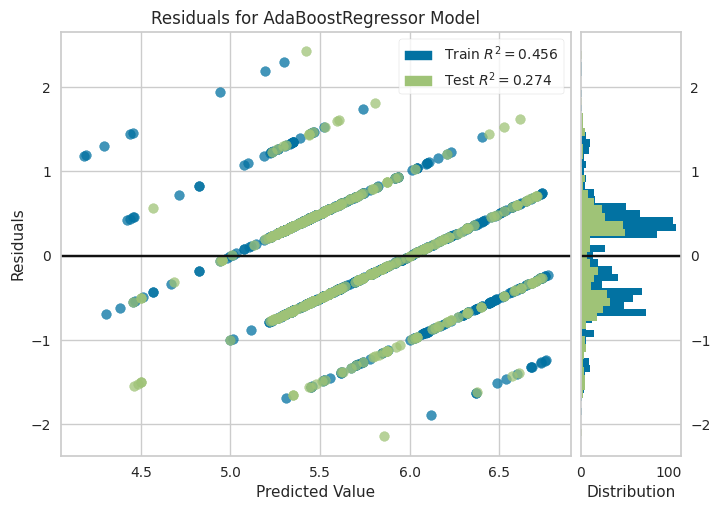

In [35]:
plot_model(tuned_ada)

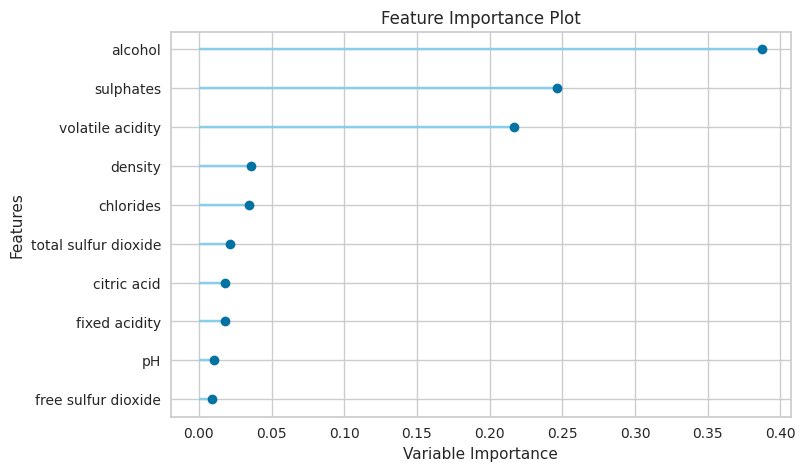

In [36]:
plot_model(tuned_ada, plot='feature')